<a href="https://colab.research.google.com/github/Shubhamshandily/AIML-DATA-Science-Projects/blob/main/Chronic_Kidney_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description : This Program Identify & classify the person with having Chronic Kideny Diseases [CKD] or not having.
#               Using Artificial Neural Network [ANN]
#            

# DATASETS LINK: https://www.kaggle.com/mansoordaku/ckdisease

In [ ]:
# Import Library
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import keras as k

In [ ]:
#Load Data
from google.colab import files
uploaded= files.upload()

df= pd.read_csv("kidney_disease.csv")

#Print Summary
df.head()

Saving kidney_disease.csv to kidney_disease (2).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
'''
Data Set Column Information:                 
age	-	age	                                        sc	-	serum creatinine 
bp	-	blood pressure                              sod	-	sodium 
sg	-	specific gravity                            pot	-	potassium 
al	-       albumin                               hemo	-	hemoglobin
su	-	sugar                                       pcv	-	packed cell volume
rbc	-	red blood cells                             wc	-	white blood cell count
pc	-	pus cell                                    rc	-	red blood cell count
pcc	-	pus cell clumps                             htn	-	hypertension
ba	-	bacteria                                    dm	-	diabetes mellitus
bgr	-	blood glucose random                        cad	-	coronary artery disease
bu	-	blood urea                                  appet	-	appetite
ane	-	anemia                                      class	-	classification
                                                  pe	-	pedal edema
'''

'\nData Set Column Information:                 \nage\t-\tage\t                                        sc\t-\tserum creatinine \nbp\t-\tblood pressure                              sod\t-\tsodium \nsg\t-\tspecific gravity                            pot\t-\tpotassium \nal\t-       albumin                               hemo\t-\themoglobin\nsu\t-\tsugar                                       pcv\t-\tpacked cell volume\nrbc\t-\tred blood cells                             wc\t-\twhite blood cell count\npc\t-\tpus cell                                    rc\t-\tred blood cell count\npcc\t-\tpus cell clumps                             htn\t-\thypertension\nba\t-\tbacteria                                    dm\t-\tdiabetes mellitus\nbgr\t-\tblood glucose random                        cad\t-\tcoronary artery disease\nbu\t-\tblood urea                                  appet\t-\tappetite\nane\t-\tanemia                                      class\t-\tclassification\n                                  

In [ ]:
#Dataset Insight
#df.describe() 
df.shape

(400, 26)

# **Data Wrangling/ Cleaning**

In [ ]:
#Retaining requried columns
columns_to_retain= ['sg', 'al','sc','hemo','pcv','wbcc','rbcc','htn','classification']

#Drop columns is not in columns_to_retain
df = df.drop( [col for col in df.columns if not col in columns_to_retain], axis=1 )

#DROP Null Value
df= df.dropna(axis=0)

In [ ]:
df.head()


,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [ ]:
#Transform the Non-Numeric data
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


## **Training**

In [ ]:
#Spilt the data into train & test
X = df.drop(['classification'], axis=1)
y = df['classification']

In [ ]:
#Feature Scaling
#Unig MinMax Method
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split train & test data into 80:20 & Suffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle= True)

In [ ]:
#Building Model
model= Sequential()
model.add( Dense( 256, input_dim= len(X.columns), kernel_initializer= k.initializers.random_normal(seed= 13),activation= 'relu'))
model.add( Dense(1, activation='hard_sigmoid'))

In [ ]:
#compile the model
model.compile (loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Train Model
history= model.fit(X_train,y_train, epochs=2000, batch_size=X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0543 - accuracy: 0.9782
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0540 - accuracy: 0.9782
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0537 - accuracy: 0.9782
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0534 - accuracy: 0.9825
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0531 - accuracy: 0.9825
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0528 - accuracy: 0.9825
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0525 - accuracy: 0.9825
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0522 - accuracy: 0.9825
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0519 - accuracy: 0.9825
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0516 - accuracy: 0.9825
Epoch 11/2000
1/1 [

In [ ]:
#Save Model
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


# Vizualize The model Loss & Accuracy

Text(0.5, 0, 'EPOCHS')

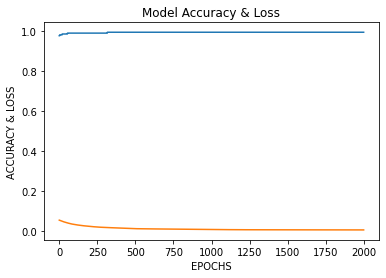

In [ ]:
#Vizualization
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy & Loss')
plt.ylabel('ACCURACY & LOSS')
plt.xlabel('EPOCHS')

In [ ]:
#Shape of Trainging & Testing Datasets
print('Shape of Training data: ',X_train.shape)
print('Shape of Test data: ',X_test.shape)

Shape of Training data:  (229, 6)
Shape of Test data:  (58, 6)


In [ ]:
#Actual and Predicted Value
pred= model.predict(X_test)
pred = [1 if y>0.5 else 0 for y in pred]

print('Original  :{0}'.format(", ".join (str(x) for x in y_test)))
print('Predicted :{0}'.format(", ".join (str(x) for x in pred)))

Original  :0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0
Predicted :0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0
